# Pre processing used initialy, after  replaced for preproccesing gray

In [5]:
'''
(train and test)
1.Cut tha retina / compare the sizes of the cutted images with its original size to verify if too many images didnt change
2.Resize 512×512   / interpolate adding a black framework in order to dont distorsionate the image
3.Histogram equalization
5.mean subsraction and normalization
6.delete images that are too much distance from the others
7. Save the array with all the modified images 
'''

from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
from PIL import Image
import cv2
import cv2.cv as cv
import math
import re
#import pickle
import retinaMethods as rm
import os
from numpy import genfromtxt
from datetime import datetime
import paths_file

#LOAD THE DATA (IMAGES AND LABELS)
#Get the labels from the CSV file
my_data = genfromtxt(paths_file.test_labels_path, delimiter=',')  
#print(my_data.shape)
labelsNum = my_data[1:,1] #Remove the first row, and take the second column
labelsNum = labelsNum.astype('uint8')

#Its necesary to load the images with a batch because there is no enought memory for all the data
path = paths_file.train_orig_path # few of kaggle
#Path in wich the edited images are going to be saved

savePath = '../numpyArrImages'          # THIS DIRECTORY DOEN'S EXIST BECAUSE IS THE OLD METHOD


all_names = os.listdir(path)
#Sort the files names to be according with the labeling file
rm.sort_nicely(all_names)  

#image_list = None
image_list = []
labels_list = []
arrayIm = np.empty((0)).astype('uint8')
arrayLabe = np.empty((0)).astype('uint8')
img_rows = img_cols = 512

#Define intervals to load the data by sections
group_size = 100 #How many images are going to be choosen in each group
stops = np.arange(0, len(all_names), group_size)
#Add the interval until the last file to cover all the data (np.arange doesn't include the last number)
stops = np.append(stops, len(all_names))
print (stops)


[    0   100   200   300   400   500   600   700   800   900  1000  1100
  1200  1300  1400  1500  1600  1700  1800  1900  2000  2100  2200  2300
  2400  2500  2600  2700  2800  2900  3000  3100  3200  3300  3400  3500
  3600  3700  3800  3900  4000  4100  4200  4300  4400  4500  4600  4700
  4800  4900  5000  5100  5200  5300  5400  5500  5600  5700  5800  5900
  6000  6100  6200  6300  6400  6500  6600  6700  6800  6900  7000  7100
  7200  7300  7400  7500  7600  7700  7800  7900  8000  8100  8200  8300
  8400  8500  8600  8700  8800  8900  9000  9100  9200  9300  9400  9500
  9600  9700  9800  9900 10000 10100 10200 10300 10400 10500 10600 10700
 10800 10900 11000 11100 11200 11300 11400 11500 11600 11700 11800 11900
 12000 12100 12200 12300 12400 12500 12600 12700 12800 12900 13000 13100
 13200 13300 13400 13500 13600 13700 13800 13900 14000 14100 14200 14300
 14400 14500 14600 14700 14800 14900 15000 15100 15200 15300 15400 15500
 15600 15700 15800 15900 16000 16100 16200 16300 16

In [2]:

print("Initial time: " , datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
#Read and process the images
for i in np.arange(1, len(stops)):
    
    newGroup = all_names[stops[i-1]:stops[i]]
    
    for filename in newGroup: 
        
        filePath = os.path.join(path, filename)
        im=cv2.imread(filePath) #im=Image.open(filename) #open: keep pointer to the file
        #Process this image
        #Cutting
        imCut = rm.cutRetina(im)
        #Make the image a square
        imSq = rm.squareImage(imCut)

        try:
            #Resize the image
            imRz = cv2.resize(imSq,(img_rows, img_cols), interpolation =  cv2.INTER_CUBIC )
            
            #Histogram equialization
            imEq = rm.histogramaEq(imRz)
            
            #print(np.min(imEq))
            #print(np.max(imEq))
            
            #Center and data normalization - IT WILL BE DO IT TO ALL OF THE IMAGES
            #imNom = rm.centerAndNormData(imEq)

            #plt.imshow(imNom)
            #plt.show()

            #Find the name of the image
            #posEnd = filename.index('.jpeg')

            #print(filename)
            
            #Save the processed image in the array 
            index = all_names.index(filename)
            image_list.append(np.rollaxis(imEq, 2))
            labels_list.append(labelsNum[index])

        except:
            print("Oops!  Was removed: " ,filename )

    #Save array with the edited images
    arrayIm = np.array(image_list)
    arrayLabe = np.array(labels_list)
  
    print("images Shape" , arrayIm.shape)
    print("labels Shape" , arrayLabe.shape)
    
    print("time of group" , i ,":" , datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
    #print(arrayIm.dtype)

    #Save .npy array
    fileName = os.path.join(savePath, "images_%s" % (i))
    np.save( fileName, arrayIm)
    fileName = os.path.join(savePath, "labels_%s" % (i))
    np.save( fileName, arrayLabe)
    
    
    #Empty variables
    del image_list
    del labels_list
    del arrayIm 
    del arrayLabe 
    
    image_list = []
    labels_list = []
    arrayIm = np.empty((0)).astype('uint8')
    arrayLabe = np.empty((0)).astype('uint8')
    
    
    '''
    #Read np array
    np.load(savePath+"/labels_1.npy") #savePath
    ''' 
            
'''
amIm = 8
offset= 0 

for i in xrange(amIm):
    plt.subplot(math.ceil(amIm/2.0),2,i+1),plt.imshow(image_list[i+offset])
    plt.xticks([]),plt.yticks([])

'''
print("End time: " , datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

print("Finally finish!")

Initial time:  2016-10-18 10:42:17
images Shape (100, 3, 512, 512)
labels Shape (100,)
time of group 1 : 2016-10-18 10:42:39
images Shape (100, 3, 512, 512)
labels Shape (100,)
time of group 2 : 2016-10-18 10:43:02
images Shape (100, 3, 512, 512)
labels Shape (100,)
time of group 3 : 2016-10-18 10:43:25
images Shape (100, 3, 512, 512)
labels Shape (100,)
time of group 4 : 2016-10-18 10:43:47
images Shape (100, 3, 512, 512)
labels Shape (100,)
time of group 5 : 2016-10-18 10:44:09
images Shape (100, 3, 512, 512)
labels Shape (100,)
time of group 6 : 2016-10-18 10:44:34
images Shape (100, 3, 512, 512)
labels Shape (100,)
time of group 7 : 2016-10-18 10:44:56
images Shape (100, 3, 512, 512)
labels Shape (100,)
time of group 8 : 2016-10-18 10:45:19
images Shape (100, 3, 512, 512)
labels Shape (100,)
time of group 9 : 2016-10-18 10:45:42
images Shape (100, 3, 512, 512)
labels Shape (100,)
time of group 10 : 2016-10-18 10:46:07
images Shape (100, 3, 512, 512)
labels Shape (100,)
time of grou

(100, 3, 512, 512)
uint8


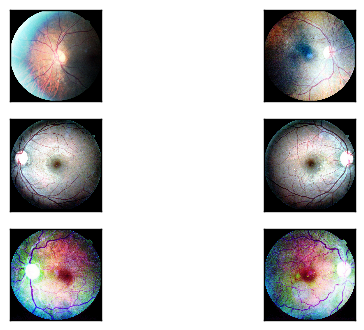

In [7]:
#Plot Some images
#-----------------------------------------------------------------
#Read np array
array = np.load(savePath+"/images_1.npy")
print(array.shape)   
print(array.dtype)   

amIm = 6
offset= 0 

for i in xrange(amIm):
    imgg = array[i+offset,:,:,:]
    #print(imgg.shape)
    imgg4 = np.rollaxis(imgg,0,3) #Roll axis to had the form RxCxL
    #print(imgg4.shape)

    plt.subplot(math.ceil(amIm/2.0),2,i+1),plt.imshow(imgg4)
    plt.xticks([]),plt.yticks([])




#---------------------------------------OLD METHOD ---------------------------------------------


In [ ]:
'''
(train and test)
1.Cut tha retina / compare the sizes of the cutted images with its original size to verify if too many images didnt change
2.Resize 512×512   / interpolate adding a black framework in order to dont distorsionate the image
3.Histogram equalization
5.mean subsraction and normalization
6.delete images that are too much distance from the others
7. Save the array with all the modified images 
'''

from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
from PIL import Image
import cv2
import cv2.cv as cv
import math
import re
import pickle
import retinaMethods as rm
import paths_file

#LOAD THE DATA
import glob
image_list = []
labels_list = []
img_rows = img_cols = 512
layers = 3

#Its necesary to load the images with a batch because there is no enought memory for all the data
path = '/home/maria.alvarez/mountedData/KaggleD/train/*.jpeg' #few of kaggle

'''
KLEE
'/home/maria.alvarez/mountedData/KaggleD/train/*.jpeg'   #Kaggle
'/home/maria.alvarez/mountedData/RetinaIm/*.jpg'         #CI4CB
'/home/maria.alvarez/mountedData/fewKaggle/*.jpeg'     #few of kaggle

PC
'/home/mariacamila/Downloads/KaggleD/train/*.jpeg'  #Kaggle
'/home/mariacamila/Downloads/RetinaIm/*.jpg'        #CI4CB
'/home/mariacamila/Downloads/fewKaggle/*.jpeg'     #few of kaggle
'''

#Define intervals to load the data by sections
maXnum = 44351 #44351 #203 few
interv = 20 #5 #3
step = int(maXnum/interv)

#conditions = [(0 ,step), (step+1 , step*2), (step*2+1, step*3),(step*3+1, step*4),(step*4+1, int(maXnum))] #5 intervals

conditions = range(0,maXnum-step,step) 

for cond in conditions:
    print(cond , cond+step)
    
    #image_list = None
    image_list = []
    labels_list = []
    
    for filename in glob.glob(path): 
        #Extract numbers of the file name
        num = int(re.findall(r'\d+', filename)[0])
        ##print(re.match("[0-9]{2}_*", filename).group(0))  #find the names wih 2 digits
        
        end = cond+step
        if(cond == conditions[len(conditions)-1]) :
            end =  maXnum

        if (cond < num <= end):    
            print(filename)
            im=cv2.imread(filename) #im=Image.open(filename) #open: keep pointer to the file
            #Process this image
            #Cutting
            imCut = rm.cutRetina(im)
            #Make the image a square
            imSq = rm.squareImage(imCut)

            try:
                #Resize the image
                imRz = cv2.resize(imSq,(img_rows, img_cols), interpolation =  cv2.INTER_CUBIC )
                #Histogram equialization
                imEq = rm.histogramaEq(imRz)
                #Center and data normalization
                imNom = rm.centerAndNormData(imEq)

                #plt.imshow(imNom)
                #plt.show()

                #Find the name of the image
                initNam = re.search('[0-9]', filename).group(0)
                posInit = filename.index(initNam)
                posEnd = filename.index('.jpeg')
                label = filename[posInit:posEnd]
                #Save the processed image in the array 
                image_list.append(imNom)
                labels_list.append(label)
                
            except:
                print("Oops!  Was removed: " ,filename )
            

            
    #Save array with the edited images
    #print(len(image_list))  
    arrayIm = np.array(image_list)
    arrayIm = arrayIm.reshape(len(image_list), layers , img_rows, img_cols)
    
    arrayLabe = np.array(labels_list)
    print("Shape" , arrayIm.shape)
    print("Shape" , arrayLabe.shape)
    
    #Save .npy array
    fileName = "numpArrays/images_%s-%s" % (cond+1,end)
    np.save( fileName, arrayIm)
    fileName = "numpArrays/labels_%s-%s" % (cond+1,end)
    np.save( fileName, arrayLabe)
    
    
    '''
    #Read np array
    np.load('images XX.npy')
    '''
    
    
    '''
    #Write a list
    fileName = "images %s-%s" % (cond[0],cond[1])
    with open(fileName, 'wb') as f:
        pickle.dump(image_list, f)
    
    fileName = "labels %s-%s" % (cond[0],cond[1])
    with open(fileName, 'wb') as f:
        pickle.dump(labels_list, f)
    
    
    #Read a list
    with open("the_filename", 'rb') as f:
        my_list2 = pickle.load(f)
    
    
    
            

amIm = 8
offset= 0 

for i in xrange(amIm):
    plt.subplot(math.ceil(amIm/2.0),2,i+1),plt.imshow(image_list[i+offset])
    plt.xticks([]),plt.yticks([])

'''
